In [2]:
import rebound
from IPython.display import display, clear_output
import matplotlib.pyplot as plt
#import ipywidgets as widgets
import numpy as np


In [5]:
sim = rebound.Simulation()
#sim.G = 4*np.pi**2
sim.G = 39.4769264214
sim.units = ['AU', 'yr', 'Msun']

sim.add("Sun")
sim.add(m=6.537671975029727e-17, e=0, P=1)


sim.move_to_com()
sim.save("error_sim.bin")


Searching NASA Horizons for 'Sun'... Found: Sun (10).


In [3]:
sim = rebound.Simulation.from_file("error_sim.bin")
print(sim.calculate_orbits()[0])

<rebound.Orbit instance, a=0.9999874091393871 e=1.7998710989588796e-16 inc=0.0 Omega=0.0 omega=0.0 f=0.0>


In [4]:
sim.t = 0
sim.move_to_com()
np.zeros
Noutputs = 100
years = 100000
orbits = np.zeros((3,Noutputs))
times = np.linspace(0.,years, Noutputs)
for i,time in enumerate(times):
    sim.integrate(time)
    #print(sim.calculate_orbits()[0])
    print(sim.particles[0].x,sim.particles[0].y,sim.particles[0].z)
    orbits[0][i] = sim.particles[1].orbit.P
    orbits[1][i] = sim.particles[1].orbit.e
    orbits[2][i] = sim.particles[1].orbit.a
    

-6.537589660113154e-17 0.0 0.0
-5.2645265092090973e-17 -3.8761887460216955e-17 0.0
-1.9411435746755942e-17 -6.242759019583191e-17 0.0
2.1382361356523877e-17 -6.178027580384675e-17 0.0
5.384859502694025e-17 -3.7072047024927057e-17 0.0
6.534298262244233e-17 2.074242137041205e-18 0.0
5.1388925846793055e-17 4.0412697991220525e-17 0.0
1.7420964497907216e-17 6.301204530049905e-17 0.0
-2.3331756675405174e-17 6.107075392618899e-17 0.0
-5.499770395940098e-17 3.5344878162880245e-17 0.0
-6.524427375383674e-17 -4.146395572458074e-18 0.0
-5.008084229698019e-17 -4.2022816316906006e-17 0.0
-1.5412951813606788e-17 -6.353305262600812e-17 0.0
2.5257658995176767e-17 -6.029973899722712e-17 0.0
5.609143488022608e-17 -3.35821201354986e-17 0.0
6.50798695031483e-17 6.2143738592148125e-18 0.0
4.872233174338996e-17 4.359062105185075e-17 0.0
1.3389419709320913e-17 6.399008745230059e-17 0.0
-2.7158128781049107e-17 5.946800730710562e-17 0.0
-5.71286864225964e-17 3.1785547671955914e-17 0.0
-6.484993530280142e-17 -8

In [19]:
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'large',
          'figure.figsize': (12, 6),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)

<IPython.core.display.Javascript object>


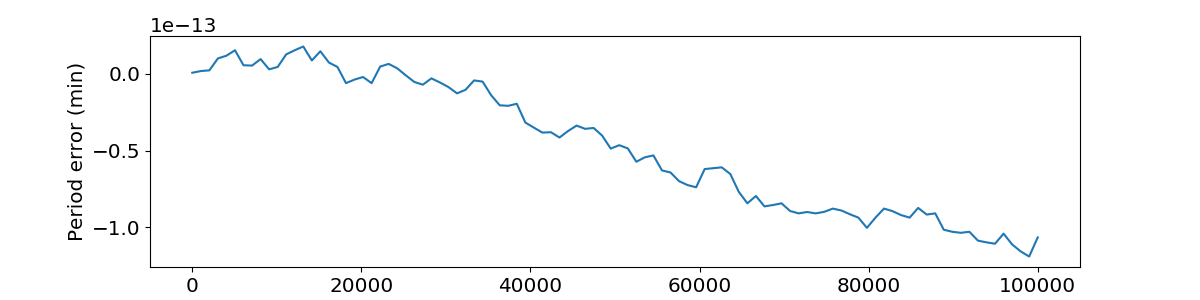

In [28]:
%matplotlib notebook
fig = plt.figure(figsize=(12,3))
ax = plt.subplot(111)
ax.set_xlabel("time [yrs]")
ax.set_ylabel("Period error [yrs]")
ax.ticklabel_format(axis='y', style='', scilimits=(8,10), useOffset=None, useLocale=None, useMathText=None)

plt.plot(times, (orbits[0]-1.0));


<IPython.core.display.Javascript object>


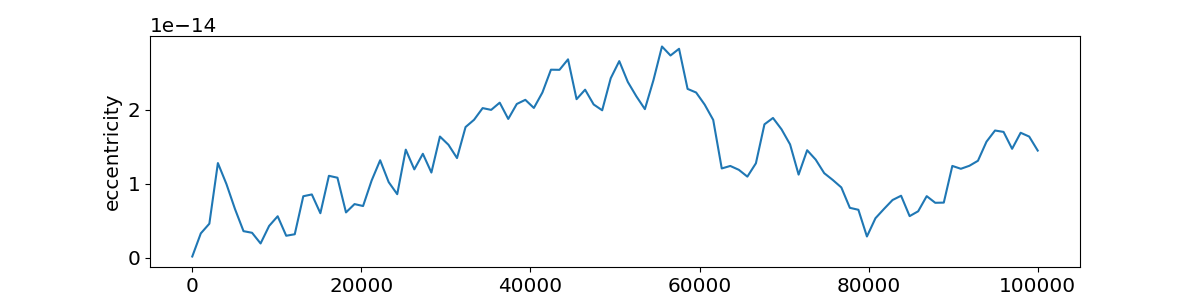

In [16]:
%matplotlib notebook
fig = plt.figure(figsize=(12,3))
ax = plt.subplot(111)
ax.set_xlabel("time [yrs]")
ax.set_ylabel("eccentricity")

plt.plot(times, orbits[1]);


<IPython.core.display.Javascript object>


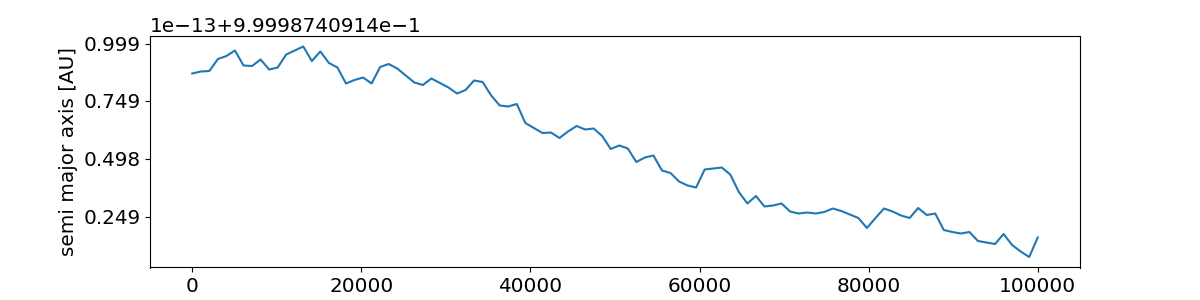

In [17]:
%matplotlib notebook
fig = plt.figure(figsize=(12,3))
ax = plt.subplot(111)
ax.set_xlabel("time [yrs]")
ax.set_ylabel("semi major axis [AU]")

plt.plot(times, orbits[2]);

<IPython.core.display.Javascript object>


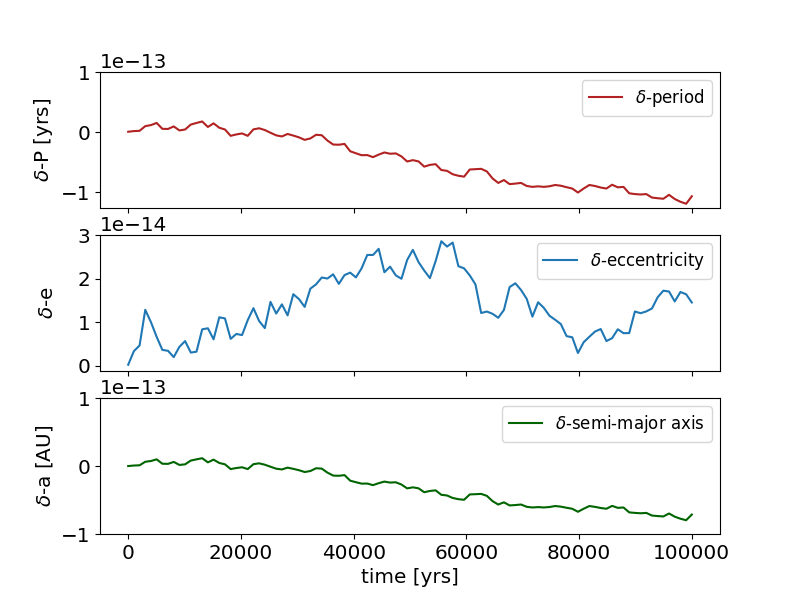

In [20]:
%matplotlib notebook
fig = plt.figure(figsize=(8,6))
ax1 = plt.subplot(311)
plt.plot(times, orbits[0]-1,color='firebrick')
ax1.set_ylabel("$\delta$-P [yrs]")
ax1.set_yticks([-1e-13,0e-13,1e-13], minor=False)
ax1.legend(['$\delta$-period'])
plt.setp(ax1.get_xticklabels(), visible=False)
#ax1.yticks(ticks=None, labels=None)

# share x only
ax2 = plt.subplot(312, sharex=ax1)
plt.plot(times, orbits[1])
ax2.set_ylabel("$\delta$-e",labelpad=15)
ax2.set_yticks([-0e-14,1e-14,2e-14,3e-14], minor=False)
ax2.legend(['$\delta$-eccentricity'],loc=1)
# make these tick labels invisible
plt.setp(ax2.get_xticklabels(), visible=False)

# share x and y
ax3 = plt.subplot(313, sharex=ax1)
plt.plot(times, orbits[2]-0.9999874091393871,color='darkgreen')
ax3.set_xlabel("time [yrs]")
ax3.set_ylabel("$\delta$-a [AU]")
ax3.legend(['$\delta$-semi-major axis'])
ax3.set_yticks([-1e-13,0,1e-13], minor=False)

plt.show()
